# 4. Keras - Malaria Cells Classification (Kaggle)

Sources: 
1. https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
2. https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/    
3. https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria
4. https://docs.opencv.org/master/d4/da8/group__imgcodecs.html 

The data for this code is taken from the kaggle competition that I have linked in the sources. 

Import Necessary Libraries. Here I will be using Keras library for making classifier. We will also requires numpy and Image for making image to array implementation. We will be using sequential model here in the notebook. 

In [1]:
# Importing Necessary Libraries.

In [1]:
import os
import cv2
import keras
from PIL import Image
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [2]:
# Data Importation

In [3]:
infected = os.listdir("/FILES/para/cell_images/Parasitized")
uninfected = os.listdir("/FILES/para/cell_images/Uninfected")

In [4]:
# Data Preparation

**Note:** **Infected images** belongs to class 1, and **uninfected images** belongs to class 0

*Creating two list image_arr and labels. image_arr will hold all images in array format while labels will    contain their corresponding labels (0,1).*

In [ ]:
images_arrary = []
image_labels = []

for img in infected:
    try:
        image = cv2.imread("para/cell_images/Parasitized/" + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((150, 150))  #Resize the image to 150 * 150
        images_arrary.append(np.array(resize_img))
        image_labels.append(1)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in uninfected:
    try:
        image=cv2.imread("para/cell_images/Uninfected/" + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((150, 150))
        images_arrary.append(np.array(resize_img))
        image_labels.append(2)
        
    except AttributeError:
        print("An error occur while reading the image")
    

In [6]:
print(len(images_arrary))
print(len(image_labels))

27558
27558


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sample of uninfected malaria cell')

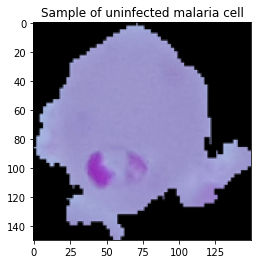

In [8]:
plt.imshow(images_arrary[0])
plt.title("Sample of uninfected malaria cell")

Saving the processed images as numpy file

Text(0.5, 1.0, 'Sample of infected malaria cell')

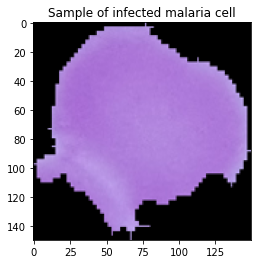

In [9]:
plt.imshow(images_arrary[-1])
plt.title("Sample of infected malaria cell")

In [10]:
train_data = np.array(images_arrary)
train_labels = np.array(image_labels)

idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)

train_data = train_data[idx]
train_labels = train_labels[idx]

In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras import optimizers
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


Xtrain, Xval, ytrain, yval = train_test_split(train_data,train_labels, test_size=0.25)

In [12]:
batch_size = 64
ntrain = len(Xtrain)
nval = len(Xval)

In [13]:
print(f'Shape of training image : {Xtrain.shape}')
print(f'Shape of validation image : {Xval.shape}')
print(f'Shape of training labels : {ytrain.shape}')
print(f'Shape of validation labels : {yval.shape}')

Shape of training image : (20668, 150, 150, 3)
Shape of validation image : (6890, 150, 150, 3)
Shape of training labels : (20668,)
Shape of validation labels : (6890,)


In [14]:
#Create data generators

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(Xtrain, ytrain, batch_size=batch_size, shuffle=False)
val_generator = train_datagen.flow(Xval, yval, batch_size=16, shuffle=False)

 # Create Keras Model

In [ ]:
# Building the model

In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(512, (3, 3), activation="relu", padding = 'same',input_shape=(150, 150, 3)))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Conv2D(254, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(Conv2D(32, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Conv2D(24, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(Conv2D(16, (3, 3), activation="relu", padding = 'same'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())

# Fully Connected Layers
model_cnn.add(Dense(activation = 'relu', units = 512))
model_cnn.add(Dense(activation = 'relu', units = 128))

model_cnn.add(Dense(activation = 'sigmoid', units = 1))

In [ ]:
from keras.utils import plot_model
plot_model(model_cnn, to_file='model.png')

In [ ]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model_cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
model_cnn.fit_generator(train_generator,steps_per_epoch=ntrain//batch_size,epochs=5,
                             validation_data=val_generator, validation_steps=nval//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:

yhat_classes = model_cnn.predict_classes(Xval, verbose=0)

yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yval, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yval, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yval, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yval, yhat_classes)
print('F1 score: %f' % f1)

# confusion matrix

matrix = confusion_matrix(yval, yhat_classes)
print(matrix)

#classiication report
cp = classification_report(yval, yhat_classes)
print(cp)

In [ ]:
import seaborn as sb
import pandas as pd

columns = ['Infected','Uninfected']  

cp_df = pd.DataFrame(matrix,columns,columns)                      
plt.figure(figsize=(10,6))  
plt.rcParams.update({'font.size': 18})
plt.title("Confusion Matrix for Malaria Cell Classification")
sb.heatmap(cp_df, annot=True, fmt='g')

In [ ]:
#Fit the model with min batch size as 50[can tune batch size to some factor of 2^power ] 
history = model_cnn.history.history

# Plot of loss and validation accuracy

In [ ]:
print(history.keys())

In [ ]:
#lets plot the train and val curve
#get the details form the history object
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)
plt.rcParams.update({'font.size': 10})
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
model_cnn.save('malaria_model.h5')
# model.save_weights('malaria_model_wieghts.h5')